In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
def std(x):
    
    x_copy = x.copy()
    
    for i in range(x_copy.shape[0]):
        x_copy[i] = (x_copy[i] - x_copy[i].mean()) / x_copy[i].std()
        
    return x_copy

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target, coef = make_regression(
    n_samples=100, 
    n_features=10,
    n_informative=2, 
    n_targets=1,
    noise=10, 
    coef=True
)

data[:2]

array([[-1.05721769,  0.33539498,  1.38795276, -0.099317  ,  1.01244345,
        -0.79491618,  1.17999911,  0.47058781,  0.93628052,  0.53931951],
       [-0.31818339, -2.29067559,  0.11574942, -0.25901537, -1.04045983,
         0.23663886,  0.44720438,  0.71167484,  1.30492852, -0.30569794]])

In [4]:
data_std = std(data)
data_std[:2]

array([[-1.85805161, -0.07140584,  1.27896813, -0.6291175 ,  0.79721027,
        -1.52153315,  1.01217499,  0.10203916,  0.69949739,  0.19021816],
       [-0.1893712 , -2.28316983,  0.27124807, -0.1265644 , -0.95606697,
         0.3995721 ,  0.62308721,  0.90382235,  1.53356058, -0.17611791]])

In [5]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [6]:
def gb(X, y, iterations=1e4, alpha=1e-2, lambda_=1e-4):
    
    X = X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))+ 2*lambda_*W) # <- L2
        
        errors.append([i, err])
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    errors = np.array(errors)
    return errors

In [7]:
def sgb(X, y, iterations=1e4, qty_in_batch=1, alpha=1e-2, lambda_=1e-4):
    
    X=X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            
            y_pred_tmp = np.dot(W, X_tmp)
            err = mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + 2*lambda_*W) # <- L2
            
            errors.append([i, err])

        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    return errors

In [8]:
iter_ = 1000
alpha = 1e-2

In [9]:
gb_res = gb(X=data, y=target, iterations=iter_, alpha=alpha, lambda_=1e-4)

100 [-0.11259755 -0.65769462  1.54967674  0.51137427 10.58348752 -0.37354228
  0.21663671 10.15562863  0.16816442 -1.08211323] 89.58636970167915
200 [-7.28020027e-02 -9.38199237e-01  1.39676861e+00  4.52978450e-01
  1.15325207e+01 -2.82692432e-03  6.95206406e-02  1.16949744e+01
  6.38688710e-01 -4.14602023e-01] 83.69854916834254
300 [-0.06296279 -0.99378736  1.24780991  0.41063872 11.65691839  0.07530612
  0.02133305 12.00041815  0.88802847 -0.23728659] 83.32060625690781
400 [-6.16087945e-02 -9.99950984e-01  1.18194566e+00  4.02491383e-01
  1.16756337e+01  9.18327299e-02  6.82949056e-03  1.20790289e+01
  9.90728002e-01 -1.91903820e-01] 83.26993006092093
500 [-6.16674163e-02 -9.99045589e-01  1.15641230e+00  4.02367338e-01
  1.16778695e+01  9.63358483e-02  2.40378739e-03  1.21034154e+01
  1.02997258e+00 -1.79329993e-01] 83.25999302544325
600 [-6.18149853e-02 -9.97956565e-01  1.14685509e+00  4.03097832e-01
  1.16776641e+01  9.78916457e-02  1.00816898e-03  1.21118592e+01
  1.04455210e+00 -

In [11]:
sgb_res = sgb(X=data, y=target, iterations=iter_, qty_in_batch=32, alpha=alpha, lambda_=1e-4)

100 [-0.02646403 -0.54538863  1.6966856   0.54281987 10.3871759  -0.21589757
  0.03800093  9.89109305  0.12300369 -1.07458335] 76.44607924663582
200 [-6.63859523e-02 -8.61753983e-01  1.42077151e+00  4.66843512e-01
  1.12566699e+01  4.43923943e-03  6.23085658e-02  1.13656209e+01
  5.68614421e-01 -4.78180853e-01] 76.87285963949093
300 [-0.07153685 -0.91294274  1.26136454  0.42645272 11.35847541  0.05120302
  0.03615653 11.64931991  0.79068786 -0.31641079] 78.12990710188234
400 [-0.07379427 -0.91770791  1.19982364  0.41968476 11.37140371  0.06108063
  0.02568623 11.71975405  0.87800347 -0.27631986] 78.62558095287756
500 [-0.07473276 -0.91672896  1.17793608  0.41979435 11.37232443  0.0639416
  0.02231748 11.74057431  0.90980371 -0.26577744] 78.79116605501315
600 [-0.07507933 -0.91579944  1.17030019  0.42044402 11.37190665  0.06498794
  0.02127163 11.74738205  0.92103744 -0.26280567] 78.84324649581491
700 [-0.07520139 -0.91533261  1.16764365  0.42081502 11.3715819   0.06539618
  0.0209489  

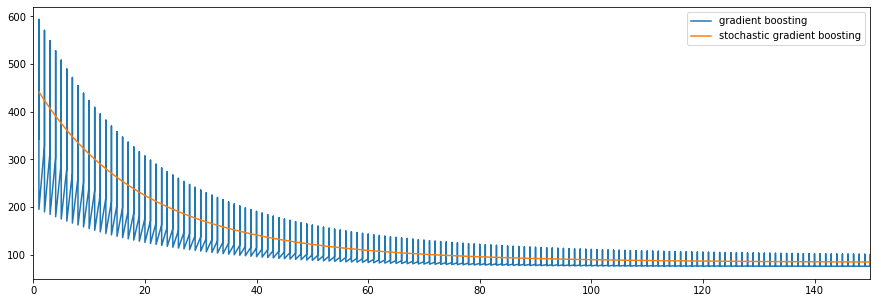

In [12]:
plt.figure(figsize=(15, 5))

plt.plot(sgb_res[:,0], sgb_res[:,1], label='gradient boosting')
plt.plot(gb_res[:,0], gb_res[:,1], label='stochastic gradient boosting')

plt.legend()
plt.xlim(0,150)

plt.show()